Networkx Analysis

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importer notre dataset 

df = pd.read_csv('./Airlines_modified.csv',sep =';')

#cleaning

df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

#information sur df

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      98 non-null     int64  
 1   dep_time        98 non-null     float64
 2   sched_dep_time  98 non-null     int64  
 3   dep_delay       98 non-null     float64
 4   arr_time        98 non-null     float64
 5   sched_arr_time  98 non-null     int64  
 6   arr_delay       98 non-null     float64
 7   carrier         98 non-null     object 
 8   flight          98 non-null     int64  
 9   tailnum         98 non-null     object 
 10  origin          98 non-null     object 
 11  dest            98 non-null     object 
 12  air_time        98 non-null     float64
 13  distance        98 non-null     int64  
 14  std             98 non-null     object 
 15  sta             98 non-null     object 
 16  atd             98 non-null     object 
 17  ata             98 non-null     objec

In [3]:
df

,Unnamed: 0,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,26/02/2013
1,1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,17/08/2013
2,2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,13/02/2013
3,3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,11/04/2013
4,4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,05/08/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1129.0,1135,-6.0,1414.0,1436,-22.0,DL,1875,N342NB,LGA,TPA,147.0,1010,11:35:00,14:36:00,11:29:00,14:14:00,29/11/2013
96,96,1029.0,1029,0.0,1300.0,1344,-44.0,UA,1605,N37465,EWR,LAX,308.0,2454,10:29:00,13:44:00,10:29:00,13:00:00,10/03/2013
97,97,1724.0,1725,-1.0,1828.0,1845,-17.0,AA,256,N3CTAA,JFK,BOS,40.0,187,17:25:00,18:45:00,17:24:00,18:28:00,25/11/2013
98,98,930.0,929,1.0,1421.0,1426,-5.0,B6,215,N638JB,EWR,SJU,200.0,1608,09:29:00,14:26:00,09:30:00,14:21:00,05/03/2013


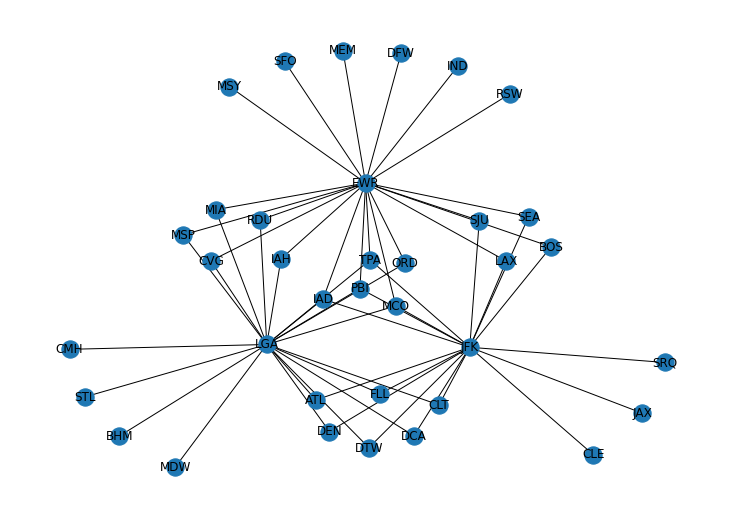

In [4]:
G = nx.from_pandas_edgelist(df,'origin','dest',edge_attr=['distance','air_time']) 

#visualiser graph
plt.figure(figsize=(10,7))
nx.draw(G,with_labels=True)

In [5]:
# Afficher tous les chemins possibles de JAX à DFW 
paths_JAX_DFW = list(nx.all_simple_paths(G,'JAX','DFW',cutoff = None))
paths_JAX_DFW

[['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'SEA', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LG

In [6]:
# Afficher tous les courts chemins possibles de JAX à DFW 
list(nx.shortest_simple_paths(G,source='JAX',target='DFW',weight='distance'))

[['JAX', 'JFK', 'BOS', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'IAD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DCA', 'LGA', 'IAD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DCA', 'LGA', 'RDU', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'IAD', 'LGA', 'RDU', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DTW', 'LGA', 'IAD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'CLT', 'LGA', 'IAD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DCA', 'LGA', 'CVG', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'IAD', 'LGA', 'CVG', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DTW', 'LGA', 'RDU', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DCA', 'LGA', 'ORD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'IAD', 'LGA', 'ORD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'CLT', 'LGA', 'RDU', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'ATL', 'LGA', 'IAD', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'TPA', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'PBI', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DTW', 'LGA', 'CVG', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'CLT', 'LGA', 'CVG', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'DCA', 'LGA', 'MCO', 'EWR', 'DFW'],
 ['JAX', 'JFK', 'MCO', 'LGA', 

In [7]:
# Afficher le chemin le plus court selon la distance de D 
short_dist =  nx.shortest_path(G,source='JAX',target='DFW',weight='distance')
short_dist

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

In [8]:
# Afficher le chemin le plus court selon le temps de vol 
short_time = nx.dijkstra_path(G,source='JAX',target='DFW',weight='air_time')
short_time

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

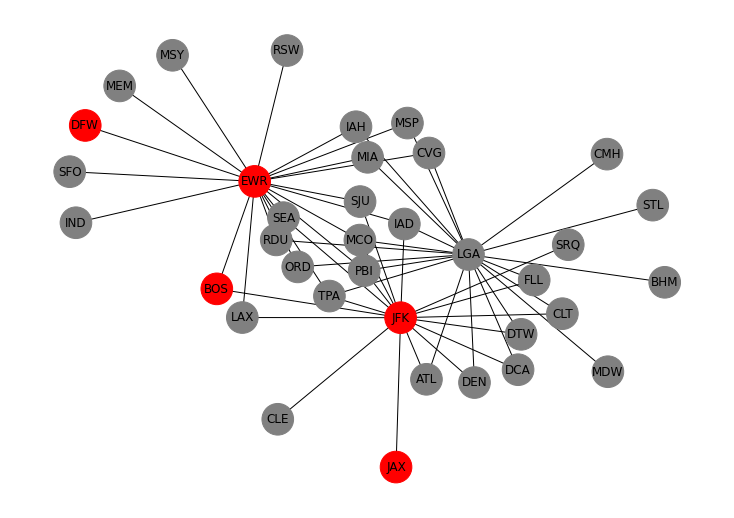

In [9]:
#Visualiser dans le graphe les différents chemins 
plt.figure(figsize=(10,7))
color = ['grey' if i not in short_dist else 'red' for i in G.nodes ]
nx.draw(G,with_labels=True,node_color=color,node_size=1000)

In [10]:
#Analyse du graphe
##centralité:

list(G.degree)
# Calculer la centralité de degré des nœuds du graphe 


centralite = nx.degree_centrality(G)
centralite_ind = list(centralite.keys())
centralite_val = list(centralite.values())
maximum = max(centralite_val)
sommets_centralite_max = [centralite_ind[i] for i in range(len(G.nodes)) if centralite_val[i] == maximum]
print(sommets_centralite_max)

['EWR', 'LGA']


In [11]:
#Calculer la densité des nœuds du graphe
nx.density(G)

0.09047619047619047